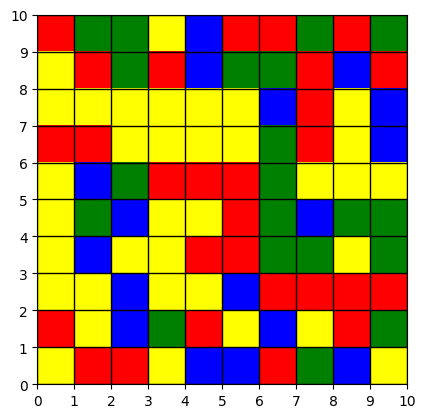

In [ ]:

import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors  # 수정된 부분

# 사각형의 크기
width, height = 10, 10

# 가능한 좌표를 모두 생성
available_positions = [(x, y) for x in range(width) for y in range(height)]

# 변수를 저장할 딕셔너리 (좌표 -> 동수)
variables = {}

# 동수 리스트
values = ['A', 'B', 'C', 'D']

# 100개의 변수를 생성
for _ in range(100):
    # 좌표를 랜덤하게 선택하고 제거하여 중복 방지
    position = random.choice(available_positions)
    available_positions.remove(position)

    # 동수는 'A', 'B', 'C', 'D' 중 하나를 랜덤으로 선택
    value = random.choice(values)

    # 딕셔너리에 좌표와 동수 저장
    variables[position] = value

# 색상 매핑
color_map = {'A': 'blue', 'B': 'green', 'C': 'yellow', 'D': 'red'}

# 10x10 격자를 만들기 위한 배열 초기화
grid = np.zeros((width, height, 3))

# 좌표와 동수를 기반으로 그리드에 색상 배치
for position, value in variables.items():
    x, y = position
    color = color_map[value]

    # matplotlib.colors에서 색상 이름을 RGB로 변환하여 그리드에 할당
    grid[x, y] = mcolors.to_rgb(color)  # 수정된 부분

# 그림을 생성
plt.imshow(grid, extent=(0, 10, 0, 10))

# 격자를 표시하기 위한 설정
plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))

# 그래프 보여주기
plt.show()


In [ ]:
variables

{(8, 9): 'A',
 (7, 4): 'D',
 (3, 8): 'C',
 (2, 9): 'B',
 (0, 5): 'D',
 (8, 4): 'B',
 (8, 6): 'B',
 (3, 1): 'D',
 (3, 7): 'C',
 (9, 7): 'A',
 (2, 1): 'D',
 (9, 4): 'B',
 (4, 7): 'A',
 (7, 5): 'A',
 (1, 0): 'D',
 (5, 6): 'B',
 (6, 1): 'D',
 (0, 1): 'C',
 (7, 3): 'A',
 (3, 4): 'A',
 (1, 4): 'B',
 (0, 8): 'D',
 (9, 3): 'B',
 (1, 1): 'A',
 (2, 5): 'B',
 (0, 2): 'D',
 (4, 8): 'B',
 (9, 5): 'D',
 (6, 6): 'C',
 (9, 8): 'C',
 (6, 5): 'C',
 (1, 9): 'C',
 (7, 9): 'A',
 (0, 3): 'A',
 (5, 5): 'B',
 (8, 3): 'C',
 (2, 6): 'A',
 (4, 5): 'C',
 (4, 0): 'B',
 (0, 4): 'C',
 (9, 0): 'D',
 (1, 6): 'A',
 (5, 4): 'D',
 (4, 6): 'C',
 (7, 0): 'A',
 (4, 1): 'A',
 (5, 2): 'D',
 (8, 1): 'B',
 (1, 8): 'A',
 (5, 9): 'A',
 (1, 7): 'B',
 (7, 6): 'B',
 (2, 2): 'B',
 (8, 5): 'A',
 (1, 5): 'A',
 (6, 4): 'C',
 (4, 2): 'B',
 (7, 7): 'C',
 (6, 7): 'B',
 (0, 0): 'C',
 (8, 8): 'C',
 (8, 7): 'A',
 (6, 9): 'C',
 (5, 1): 'D',
 (5, 7): 'B',
 (8, 2): 'D',
 (9, 9): 'B',
 (2, 3): 'C',
 (4, 3): 'A',
 (7, 8): 'C',
 (6, 0): 'C',
 (0, 9

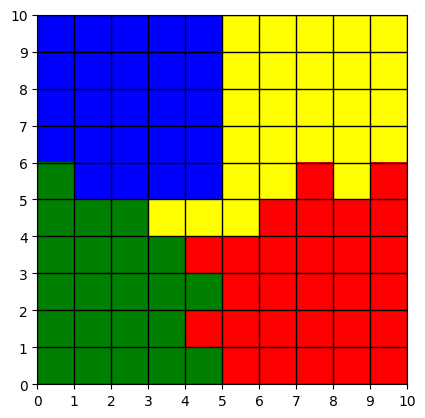

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# 사각형의 크기
width, height = 10, 10

# 가능한 좌표를 모두 생성
available_positions = [(x, y) for x in range(width) for y in range(height)]

# 동수 리스트
values = ['A', 'B', 'C', 'D']

# 기준점 정의
reference_points = {
    'A': (0, 0),     # 왼쪽 아래
    'B': (9, 0),     # 오른쪽 아래
    'C': (0, 9),     # 왼쪽 위
    'D': (9, 9)      # 오른쪽 위
}

# 각 동수에 대해 기준점으로부터의 거리를 계산하고 정렬
def sort_by_distance(value, positions):
    ref_x, ref_y = reference_points[value]
    return sorted(positions, key=lambda pos: abs(pos[0] - ref_x) + abs(pos[1] - ref_y))

# 변수를 저장할 딕셔너리 (좌표 -> 동수)
variables = {}

# 100개의 변수를 생성
for _ in range(100):
    # 동수를 랜덤하게 선택
    value = random.choice(values)

    # 남은 좌표 중 기준점으로부터 가장 가까운 좌표를 선택
    sorted_positions = sort_by_distance(value, available_positions)
    position = sorted_positions[0]  # 가장 가까운 좌표 선택
    available_positions.remove(position)  # 선택된 좌표는 제거하여 중복 방지

    # 딕셔너리에 좌표와 동수 저장
    variables[position] = value

# 색상 매핑
color_map = {'A': 'blue', 'B': 'green', 'C': 'yellow', 'D': 'red'}

# 10x10 격자를 만들기 위한 배열 초기화
grid = np.zeros((width, height, 3))

# 좌표와 동수를 기반으로 그리드에 색상 배치
for position, value in variables.items():
    x, y = position
    color = color_map[value]

    # matplotlib.colors에서 색상 이름을 RGB로 변환하여 그리드에 할당
    grid[x, y] = mcolors.to_rgb(color)

# 그림을 생성
plt.imshow(grid, extent=(0, 10, 0, 10))

# 격자를 표시하기 위한 설정
plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))

# 그래프 보여주기
plt.show()


In [ ]:
variables

{(0, 0): 'A',
 (0, 1): 'A',
 (0, 9): 'C',
 (0, 8): 'C',
 (9, 0): 'B',
 (1, 0): 'A',
 (1, 9): 'C',
 (9, 9): 'D',
 (8, 9): 'D',
 (0, 2): 'A',
 (0, 7): 'C',
 (1, 8): 'C',
 (2, 9): 'C',
 (0, 6): 'C',
 (1, 7): 'C',
 (2, 8): 'C',
 (8, 0): 'B',
 (9, 8): 'D',
 (7, 9): 'D',
 (8, 8): 'D',
 (1, 1): 'A',
 (3, 9): 'C',
 (9, 7): 'D',
 (2, 0): 'A',
 (0, 5): 'C',
 (9, 1): 'B',
 (6, 9): 'D',
 (0, 3): 'A',
 (7, 8): 'D',
 (8, 7): 'D',
 (9, 6): 'D',
 (5, 9): 'D',
 (6, 8): 'D',
 (1, 6): 'C',
 (1, 2): 'A',
 (7, 7): 'D',
 (7, 0): 'B',
 (2, 1): 'A',
 (8, 6): 'D',
 (3, 0): 'A',
 (2, 7): 'C',
 (3, 8): 'C',
 (9, 5): 'D',
 (8, 1): 'B',
 (4, 9): 'D',
 (5, 8): 'D',
 (0, 4): 'C',
 (9, 2): 'B',
 (1, 5): 'C',
 (6, 0): 'B',
 (2, 6): 'C',
 (3, 7): 'C',
 (7, 1): 'B',
 (4, 8): 'C',
 (1, 3): 'A',
 (1, 4): 'C',
 (6, 7): 'D',
 (2, 5): 'C',
 (2, 2): 'A',
 (7, 6): 'D',
 (8, 5): 'D',
 (3, 6): 'C',
 (8, 2): 'B',
 (4, 7): 'C',
 (2, 4): 'C',
 (9, 4): 'D',
 (3, 5): 'C',
 (3, 1): 'A',
 (9, 3): 'B',
 (4, 6): 'C',
 (5, 7): 'D',
 (5, 0

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 사각형의 크기
width, height = 10, 10

# 가능한 좌표를 모두 생성
available_positions = [(x, y) for x in range(width) for y in range(height)]

# 동수 리스트
values = ['A', 'B', 'C', 'D']

# 기준점 정의
reference_points = {
    'A': (0, 0),     # 왼쪽 아래
    'B': (9, 0),     # 오른쪽 아래
    'C': (0, 9),     # 왼쪽 위
    'D': (9, 9)      # 오른쪽 위
}

# 각 동수에 대해 기준점으로부터의 거리를 계산하고 정렬
def sort_by_distance(value, positions):
    ref_x, ref_y = reference_points[value]
    return sorted(positions, key=lambda pos: abs(pos[0] - ref_x) + abs(pos[1] - ref_y))

# 변수를 저장할 딕셔너리 (좌표 -> 동수)
variables = {}

# 100개의 변수를 생성
for _ in range(100):
    # 동수를 랜덤하게 선택
    value = random.choice(values)

    # 남은 좌표 중 기준점으로부터 가장 가까운 좌표를 선택
    sorted_positions = sort_by_distance(value, available_positions)
    position = sorted_positions[0]  # 가장 가까운 좌표 선택
    available_positions.remove(position)  # 선택된 좌표는 제거하여 중복 방지

    # 딕셔너리에 좌표와 동수 저장
    variables[position] = value

# 색상 매핑
color_map = {'A': 'blue', 'B': 'green', 'C': 'yellow', 'D': 'red'}

# 10x10 격자를 만들기 위한 배열 초기화
grid = np.zeros((width, height, 3))

# 애니메이션 업데이트 함수
def update(frame):
    if frame < len(variables):
        position = list(variables.keys())[frame]
        value = variables[position]
        color = mcolors.to_rgb(color_map[value])
        grid[position] = color  # 해당 위치에 색상 업데이트
    img.set_array(grid)
    return img,

# 그림을 생성
fig, ax = plt.subplots()
img = ax.imshow(grid, extent=(0, 10, 0, 10))
plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(variables), interval=100, blit=True)

# 애니메이션을 HTML로 변환하여 보여주기
HTML(ani.to_html5_video())


[('B', 'L'), ('D', 'L'), ('A', 'S'), ('A', 'M'), ('A', 'M')]

좌표 (0, 0): ['B', 'L']
좌표 (0, 1): ['D', 'L']
좌표 (0, 2): ['A', 'S']
좌표 (0, 3): ['A', 'M']
좌표 (0, 4): ['A', 'M']
좌표 (0, 5): ['D', 'L']
좌표 (0, 6): ['C', 'M']
좌표 (0, 7): ['C', 'S']
좌표 (0, 8): ['C', 'M']
좌표 (0, 9): ['B', 'L']
좌표 (1, 0): ['A', 'M']
좌표 (1, 1): ['B', 'S']
좌표 (1, 2): ['D', 'L']
좌표 (1, 3): ['B', 'S']
좌표 (1, 4): ['B', 'M']
좌표 (1, 5): ['A', 'L']
좌표 (1, 6): ['B', 'L']
좌표 (1, 7): ['D', 'L']
좌표 (1, 8): ['C', 'L']
좌표 (1, 9): ['B', 'L']
좌표 (2, 0): ['C', 'M']
좌표 (2, 1): ['C', 'L']
좌표 (2, 2): ['B', 'S']
좌표 (2, 3): ['B', 'M']
좌표 (2, 4): ['C', 'S']
좌표 (2, 5): ['A', 'L']
좌표 (2, 6): ['C', 'L']
좌표 (2, 7): ['D', 'L']
좌표 (2, 8): ['C', 'L']
좌표 (2, 9): ['A', 'L']
좌표 (3, 0): ['A', 'L']
좌표 (3, 1): ['B', 'S']
좌표 (3, 2): ['C', 'L']
좌표 (3, 3): ['C', 'M']
좌표 (3, 4): ['B', 'M']
좌표 (3, 5): ['C', 'S']
좌표 (3, 6): ['D', 'M']
좌표 (3, 7): ['B', 'S']
좌표 (3, 8): ['A', 'M']
좌표 (3, 9): ['B', 'M']
좌표 (4, 0): ['B', 'S']
좌표 (4, 1): ['D', 'M']
좌표 (4, 2): ['B', 'M']
좌표 (4, 3): ['B', 'L']
좌표 (4, 4): ['D', 'S']
좌표 (4, 5):

'\n\nfor coord2, cars in parking_lot2.items():\n    print(f"좌표 {coord1}: {cars}")\n\n\nfor coord3, cars in parking_lot3.items():\n    print(f"좌표 {coord1}: {cars}")\n'

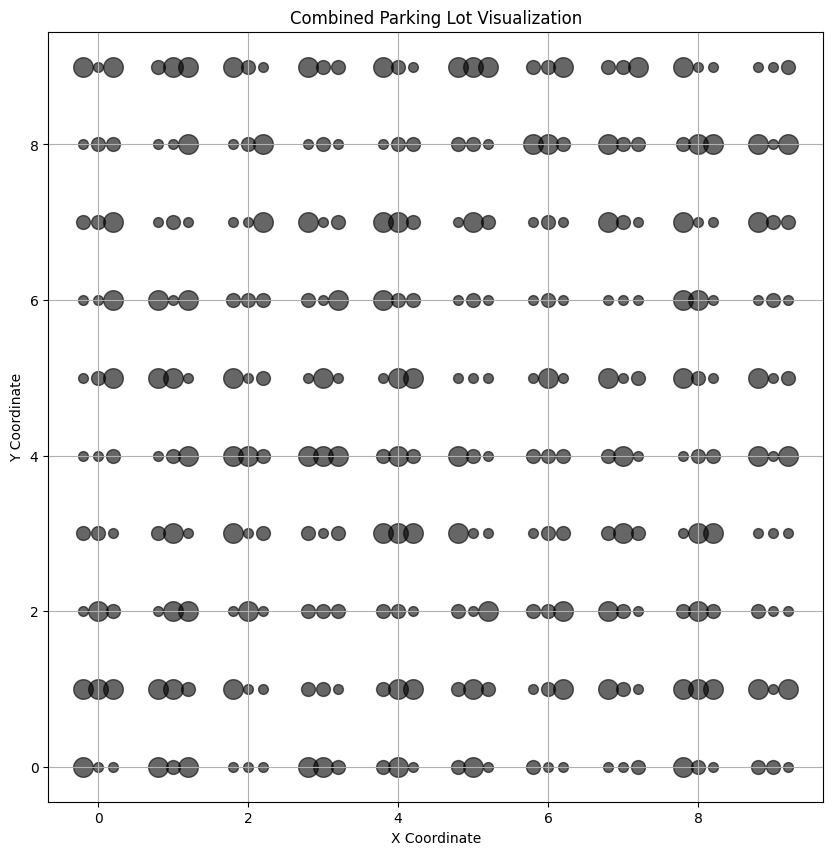

In [ ]:
import random
import matplotlib.pyplot as plt

def generate_random_data(num_points=300):
    # Initialize empty list to store the data
    data = []

    # Define possible values for 동수 and 크기
    dong_values = ['A', 'B', 'C', 'D']
    size_values = ['S', 'M', 'L']

    # Generate random data points
    for _ in range(num_points):
        # Randomly select 동수 and 크기
        dong = random.choice(dong_values)
        size = random.choice(size_values)

        # Append the generated data to the list
        data.append((dong, size))

    return data

# Generate data using the function
random_data = generate_random_data()

# Create 10x10 coordinates
coordinates = [(x, y) for x in range(10) for y in range(10)]

# Create dictionaries for each parking lot
parking_lot1 = {coord1: [] for coord1 in coordinates}
parking_lot2 = {coord2: [] for coord2 in coordinates}
parking_lot3 = {coord3: [] for coord3 in coordinates}

# Assign random data to each coordinate in the parking lots
i = 0
for coord1 in parking_lot1.keys():
    parking_lot1[coord1] = [random_data[i][0], random_data[i][1]]
    i += 1

for coord2 in parking_lot2.keys():
    parking_lot2[coord2] = [random_data[i][0], random_data[i][1]]
    i += 1

for coord3 in parking_lot3.keys():
    parking_lot3[coord3] = [random_data[i][0], random_data[i][1]]
    i += 1

# Define color and size mapping
color_mapping = {'A': 'black', 'B': 'black', 'C': 'black', 'D': 'black'}
#color_mapping = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'yellow'}
size_mapping = {'S': 50, 'M': 100, 'L': 200}

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 10))

# Add a small offset for each parking lot to avoid overlap
offsets = [(-0.2, 0), (0.0, 0.0), (0.2, 0)]

# Plot data from each parking lot with a slight offset to avoid overlap
for idx, (parking_lot, offset) in enumerate(zip([parking_lot1, parking_lot2, parking_lot3], offsets)):
    for coord in parking_lot.keys():
        x, y = coord
        x += offset[0]
        y += offset[1]

        # Get car details from each parking lot
        car_dong, car_size = parking_lot[coord]

        # Plot each car as a point with specific color and size
        ax.scatter(x, y, color=color_mapping[car_dong], s=size_mapping[car_size], alpha=0.6, edgecolor='black')

# Customize plot
ax.set_title("Combined Parking Lot Visualization")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.grid(True)

# Show plot
plt.show()


('A', 'S')
('B', 'S')
('B', 'S')
('B', 'S')
('B', 'S')


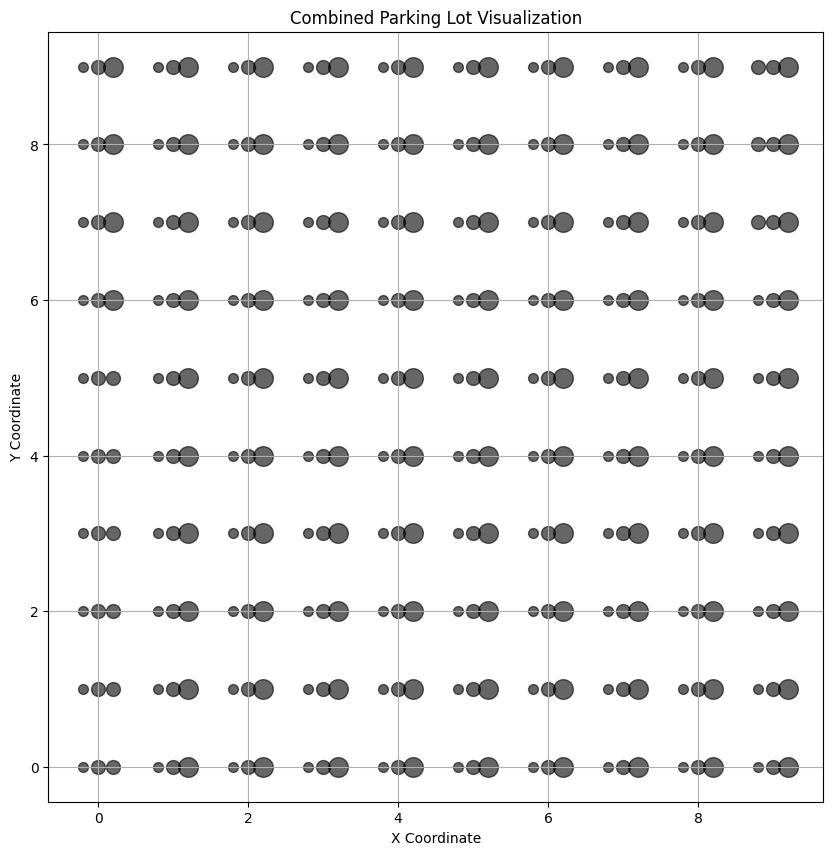

In [ ]:
import random
import matplotlib.pyplot as plt

def generate_random_data(num_points=300):
    # Initialize empty list to store the data
    data = []

    # Define possible values for 동수 and 크기
    dong_values = ['A', 'B', 'C', 'D']
    size_values = ['S', 'M', 'L']

    # Generate random data points
    for _ in range(num_points):
        # Randomly select 동수 and 크기
        dong = random.choice(dong_values)
        size = random.choice(size_values)

        # Append the generated data to the list
        data.append((dong, size))

    return data

# Generate data using the function
random_data = generate_random_data()


# 크기(S, M, L)에 우선순위를 부여할 딕셔너리 생성
size_priority = {'S': 0, 'M': 1, 'L': 2}

# random_data 리스트를 크기(S, M, L) 기준으로 정렬
sorted_data = sorted(random_data, key=lambda x: size_priority[x[1]])

# 정렬된 데이터 확인
for data in sorted_data[:5]:  # 처음 5개의 데이터를 확인
    print(data)


random_data = sorted_data


# Create 10x10 coordinates
coordinates = [(x, y) for x in range(10) for y in range(10)]

# Create dictionaries for each parking lot
parking_lot1 = {coord1: [] for coord1 in coordinates}
parking_lot2 = {coord2: [] for coord2 in coordinates}
parking_lot3 = {coord3: [] for coord3 in coordinates}

# Assign random data to each coordinate in the parking lots
i = 0
for coord1 in parking_lot1.keys():
    parking_lot1[coord1] = [random_data[i][0], random_data[i][1]]
    i += 1

for coord2 in parking_lot2.keys():
    parking_lot2[coord2] = [random_data[i][0], random_data[i][1]]
    i += 1

for coord3 in parking_lot3.keys():
    parking_lot3[coord3] = [random_data[i][0], random_data[i][1]]
    i += 1

# Define color and size mapping
color_mapping = {'A': 'black', 'B': 'black', 'C': 'black', 'D': 'black'}
#color_mapping = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'yellow'}
size_mapping = {'S': 50, 'M': 100, 'L': 200}

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 10))

# Add a small offset for each parking lot to avoid overlap
offsets = [(-0.2, 0), (0.0, 0.0), (0.2, 0)]

# Plot data from each parking lot with a slight offset to avoid overlap
for idx, (parking_lot, offset) in enumerate(zip([parking_lot1, parking_lot2, parking_lot3], offsets)):
    for coord in parking_lot.keys():
        x, y = coord
        x += offset[0]
        y += offset[1]

        # Get car details from each parking lot
        car_dong, car_size = parking_lot[coord]

        # Plot each car as a point with specific color and size
        ax.scatter(x, y, color=color_mapping[car_dong], s=size_mapping[car_size], alpha=0.6, edgecolor='black')

# Customize plot
ax.set_title("Combined Parking Lot Visualization")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.grid(True)

# Show plot
plt.show()


<ipython-input-9-d449a4cdd917>:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((i, -set_index), size_mapping[size], size_mapping[size], color=color_mapping[destination], edgecolor='black'))


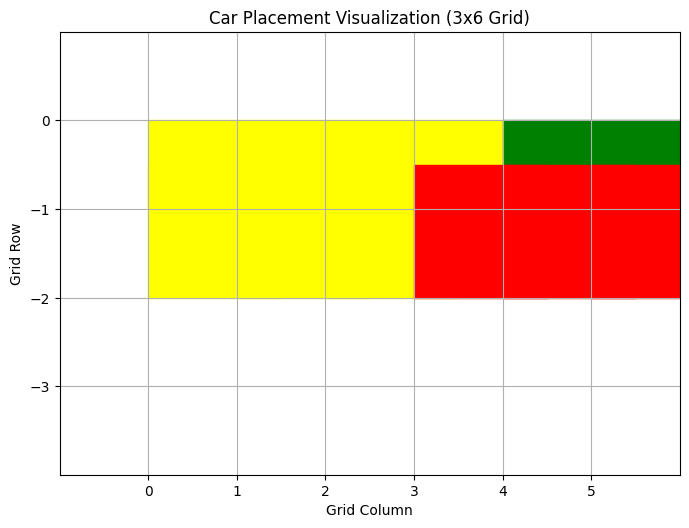

In [ ]:
import matplotlib.pyplot as plt

# 주어진 자동차 데이터
grid = [
    [[0, 'D'], [1, 'D'], [2, 'D']],
    [[0, 'D'], [1, 'B'], [2, 'D']],
    [[0, 'C'], [1, 'B'], [2, 'D']],
    [[0, 'C'], [1, 'C'], [2, 'C']],
    [[0, 'C'], [1, 'C'], [2, 'C']],
    [[0, 'C'], [1, 'C'], [2, 'C']],

    [[0, 'D'], [1, 'B'], [2, 'B']],
    [[0, 'C'], [1, 'B'], [2, 'B']],
    [[0, 'C'], [1, 'B'], [2, 'D']],
    [[0, 'C'], [1, 'B'], [2, 'C']],
    [[0, 'C'], [1, 'C'], [2, 'C']],
    [[0, 'C'], [1, 'C'], [2, 'A']],

    [[0, 'B'], [1, 'B'], [2, 'B']],
    [[0, 'B'], [1, 'B'], [2, 'B']],
    [[0, 'A'], [1, 'B'], [2, 'B']],
    [[0, 'A'], [1, 'B'], [2, 'A']],
    [[0, 'A'], [1, 'A'], [2, 'A']],
    [[0, 'A'], [1, 'A'], [2, 'A']]
]

# 색상 매핑
color_mapping = {'A': 'red', 'B': 'yellow', 'C': 'green', 'D': 'blue'}

# 크기 매핑
size_mapping = {0: 0.5, 1: 1, 2: 1.5}  # 사각형 크기 비율

# 시각화
plt.figure(figsize=(8, 6))

# 각 자동차 데이터에 대해 반복
for set_index in range(3):  # 3개 세트
    for i in range(6):  # 각 세트의 6개 열
        size = grid[i + set_index * 6][set_index][0]  # 크기
        destination = grid[i + set_index * 6][set_index][1]  # 목적지

        if size != 0:  # size가 0인 경우에는 표시하지 않음
            # 사각형 그리기
            plt.gca().add_patch(plt.Rectangle((i, -set_index), size_mapping[size], size_mapping[size], color=color_mapping[destination], edgecolor='black'))

# 그래프 설정
plt.title("Car Placement Visualization (3x6 Grid)")
plt.xlabel("Grid Column")
plt.ylabel("Grid Row")
plt.xlim(-1, 6)
plt.ylim(-4, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xticks(range(6))  # x축 눈금 설정
plt.yticks(range(-3, 1))  # y축 눈금 설정
plt.show()


In [10]:
# 필요한 라이브러리 임포트
import pandas as pd

# 데이터 로드 (train.csv와 test.csv 파일 경로 지정)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# 테스트 데이터 전처리
# 결측치 처리 (Age의 결측치를 중간값으로 대체)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# 새로운 규칙 적용: 나이가 60세 이상이거나 20세 이하면 생존(1), 그 외는 사망(0)
test_predictions_age = test_data['Age'].apply(lambda x: 1 if x >= 60 or x <= 20 else 0)

# PassengerId와 예측 결과(Survived)를 사용해 데이터프레임 생성
submission_age_test = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions_age
})

# 결과를 CSV 파일로 저장 (Kaggle 제출용)
submission_age_test.to_csv('titanic_test_age_submission.csv', index=False)

# 저장된 파일 경로를 출력
print('titanic_test_age_submission.csv 파일이 생성되었습니다.')


titanic_test_age_submission.csv 파일이 생성되었습니다.


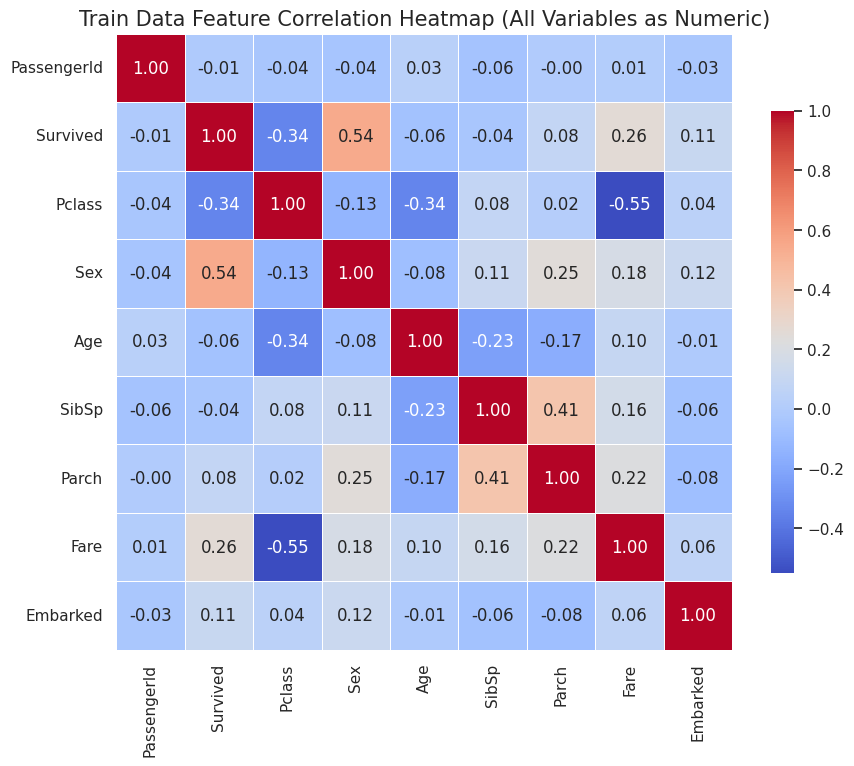

In [12]:
# 필요한 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (train.csv 파일 경로 지정)
train_data = pd.read_csv('train.csv')

# 문자형 변수를 숫자형으로 변환
# 'Sex' 컬럼 변환 (male=0, female=1)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# 'Embarked' 컬럼 변환 (S=0, C=1, Q=2)
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 'Cabin'은 많은 결측치가 있어 제거하거나 처리 방법을 고려해야 함 (일단 제거)
train_data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# 결측치 처리 (Age와 Fare 컬럼의 결측치를 중간값으로 대체)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# 숫자형 변수만 선택 (변환된 문자형 변수 포함)
numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns

# 상관관계 계산
correlation_matrix = train_data[numeric_features].corr()

# 시각화 설정
plt.figure(figsize=(10, 8))
sns.set(style="white")

# 상관관계 히트맵 생성
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": .75})

# 제목 추가
plt.title('Train Data Feature Correlation Heatmap (All Variables as Numeric)', size=15)
plt.show()
